<a href="https://colab.research.google.com/github/cepdnaclk/e18-4yp-Predicting-Forex-Currency-Exchange-Rate-using-Machine-Learning/blob/main/models/EURUSD/EURUSD_IN1_LSTM_Bayesian_Version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_ta
!pip install bayesian-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=201d7e49e75ab80ebbec957666bc7eba679911da532b02673fd2ac80413ea16d
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import pandas as pd
import pandas_ta as ta

data = pd.read_csv('EURUSD=X.csv')

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-05,1.128605,1.128796,1.120825,1.128579,1.128579,0
1,2019-07-08,1.122788,1.123722,1.120838,1.122738,1.122738,0
2,2019-07-09,1.121479,1.122208,1.119532,1.121604,1.121604,0
3,2019-07-10,1.120461,1.126300,1.120260,1.120825,1.120825,0
4,2019-07-11,1.126126,1.128796,1.125176,1.125885,1.125885,0
...,...,...,...,...,...,...,...
1301,2024-07-01,1.073526,1.077819,1.072076,1.073526,1.073526,0
1302,2024-07-02,1.073710,1.074610,1.071065,1.073710,1.073710,0
1303,2024-07-03,1.074841,1.081560,1.073710,1.074841,1.074841,0
1304,2024-07-04,1.079331,1.081666,1.078423,1.079331,1.079331,0


In [ ]:
data['T-4'] = data['Close']
data['T-3'] = data['Close'].shift(-1)
data['T-2'] = data['Close'].shift(-2)
data['T-1'] = data['Close'].shift(-3)
data['T0'] = data['Close'].shift(-4)

data['SMA_5_H'] = ta.sma(data['High'], length=5).shift(-4)
data['SMA_5_L'] = ta.sma(data['Low'], length=5).shift(-4)
data['EMA_5_C'] = ta.ema(data['Close'], length=5).shift(-4)
data['RSI'] = ta.rsi(data['Close'], length=14).shift(-14)

#Closing value of the next day
data['T_F'] = data['Close'].shift(-5)

print(data.head(10))


         Date      Open      High       Low     Close  Adj Close  Volume  \
0  2019-07-05  1.128605  1.128796  1.120825  1.128579   1.128579       0   
1  2019-07-08  1.122788  1.123722  1.120838  1.122738   1.122738       0   
2  2019-07-09  1.121479  1.122208  1.119532  1.121604   1.121604       0   
3  2019-07-10  1.120461  1.126300  1.120260  1.120825   1.120825       0   
4  2019-07-11  1.126126  1.128796  1.125176  1.125885   1.125885       0   
5  2019-07-12  1.125024  1.127800  1.123974  1.125239   1.125239       0   
6  2019-07-15  1.127180  1.128599  1.125568  1.127205   1.127205       0   
7  2019-07-16  1.126088  1.126634  1.120900  1.126177   1.126177       0   
8  2019-07-17  1.121328  1.123343  1.120109  1.121227   1.121227       0   
9  2019-07-18  1.122776  1.124733  1.120624  1.122965   1.122965       0   

        T-4       T-3       T-2       T-1        T0   SMA_5_H   SMA_5_L  \
0  1.128579  1.122738  1.121604  1.120825  1.125885  1.125964  1.121326   
1  1.122738  

In [ ]:
print(data.tail(10))

            Date      Open      High       Low     Close  Adj Close  Volume  \
1296  2024-06-24  1.068776  1.074703  1.068444  1.068776   1.068776       0   
1297  2024-06-25  1.073272  1.074576  1.069221  1.073272   1.073272       0   
1298  2024-06-26  1.070962  1.072041  1.066769  1.070962   1.070962       0   
1299  2024-06-27  1.068011  1.072616  1.067783  1.068011   1.068011       0   
1300  2024-06-28  1.070847  1.072099  1.068604  1.070847   1.070847       0   
1301  2024-07-01  1.073526  1.077819  1.072076  1.073526   1.073526       0   
1302  2024-07-02  1.073710  1.074610  1.071065  1.073710   1.073710       0   
1303  2024-07-03  1.074841  1.081560  1.073710  1.074841   1.074841       0   
1304  2024-07-04  1.079331  1.081666  1.078423  1.079331   1.079331       0   
1305  2024-07-05  1.081432  1.084363  1.081198  1.083306   1.083306       0   

           T-4       T-3       T-2       T-1        T0   SMA_5_H   SMA_5_L  \
1296  1.068776  1.073272  1.070962  1.068011  1.0708

In [ ]:
# Dropping NaN values
data.dropna(inplace=True)

print(data.tail(10))


            Date      Open      High       Low     Close  Adj Close  Volume  \
1282  2024-06-04  1.090739  1.091822  1.086071  1.090739   1.090739       0   
1283  2024-06-05  1.088187  1.088992  1.086095  1.088187   1.088187       0   
1284  2024-06-06  1.087453  1.089871  1.086366  1.087453   1.087453       0   
1285  2024-06-07  1.089443  1.090180  1.080497  1.089443   1.089443       0   
1286  2024-06-10  1.077888  1.078283  1.073364  1.077888   1.077888       0   
1287  2024-06-11  1.076426  1.077354  1.072110  1.076426   1.076426       0   
1288  2024-06-12  1.074033  1.085175  1.073503  1.074033   1.074033       0   
1289  2024-06-13  1.081315  1.081783  1.075384  1.081315   1.081315       0   
1290  2024-06-14  1.073883  1.074576  1.066815  1.073883   1.073883       0   
1291  2024-06-17  1.070217  1.072616  1.068764  1.070217   1.070217       0   

           T-4       T-3       T-2       T-1        T0   SMA_5_H   SMA_5_L  \
1282  1.090739  1.088187  1.087453  1.089443  1.0778

In [ ]:
data = data[['Date', 'T-4','T-3','T-2','T-1','T0','SMA_5_H','SMA_5_L','EMA_5_C','RSI','T_F']]

data

,Date,T-4,T-3,T-2,T-1,T0,SMA_5_H,SMA_5_L,EMA_5_C,RSI,T_F
0,2019-07-05,1.128579,1.122738,1.121604,1.120825,1.125885,1.125964,1.121326,1.123926,28.600071,1.125239
1,2019-07-08,1.122738,1.121604,1.120825,1.125885,1.125239,1.125765,1.121956,1.124364,29.742124,1.127205
2,2019-07-09,1.121604,1.120825,1.125885,1.125239,1.127205,1.126741,1.122902,1.125311,27.933541,1.126177
3,2019-07-10,1.120825,1.125885,1.125239,1.127205,1.126177,1.127626,1.123176,1.125600,31.427960,1.121227
4,2019-07-11,1.125885,1.125239,1.127205,1.126177,1.121227,1.127034,1.123145,1.124142,35.998432,1.122965
...,...,...,...,...,...,...,...,...,...,...,...
1287,2024-06-11,1.076426,1.074033,1.081315,1.073883,1.070217,1.078301,1.071315,1.075348,47.172292,1.074068
1288,2024-06-12,1.074033,1.081315,1.073883,1.070217,1.074068,1.078055,1.071115,1.074921,47.410069,1.074229
1289,2024-06-13,1.081315,1.073883,1.070217,1.074068,1.074229,1.076085,1.070940,1.074691,48.931625,1.075153
1290,2024-06-14,1.073883,1.070217,1.074068,1.074229,1.075153,1.074736,1.070015,1.074845,54.553191,1.070641


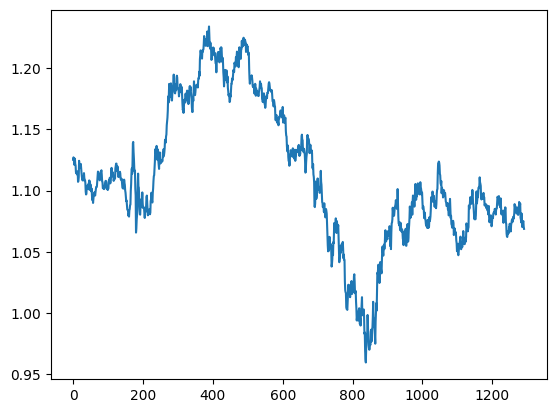

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['T_F'])

In [ ]:
dates=data['Date'].to_numpy()
middle_matrix =data[['T-4','T-3','T-2','T-1','T0','SMA_5_H','SMA_5_L','EMA_5_C','RSI']].to_numpy()
X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
Y=data['T_F']

print(dates.shape)
print(X.shape)
print(Y.shape)

(1292,)
(1292, 9, 1)
(1292,)


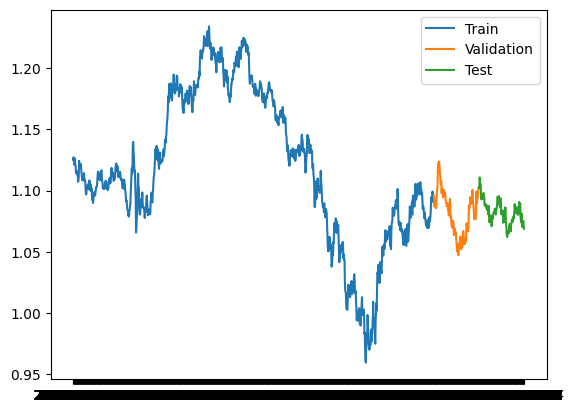

In [ ]:
q_80 = int(len(dates) * .8) #change to 0.8
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], Y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], Y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization
import numpy as np
import time

def evaluate_network(lstm_units_1,epochs,learning_rate,dense_units_1,dense_units_2):

  lstm_units_1=int(lstm_units_1)
  epochs=int(epochs)
  dense_units_1=int(dense_units_1)
  dense_units_2=int(dense_units_2)

  model = Sequential([layers.Input((9, 1)),
                      layers.LSTM(lstm_units_1),
                      layers.Dense(dense_units_1, activation='relu'),
                      layers.Dense(dense_units_2, activation='relu'),
                      layers.Dense(1)])

  model.compile(loss='mse',
                optimizer=Adam(learning_rate=learning_rate),
                metrics=['mean_absolute_error'])


  # Train the model
  history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, verbose=0)

  # Return the loss (or another metric that you want to minimize)
  val_loss=min(history.history['val_loss'])
  loss=min(history.history['loss'])

  return -(val_loss*loss)  # Negative because BayesianOptimization maximizes, but we want to minimize loss



pbounds = {
    'lstm_units_1': (20, 300),
    'learning_rate': (1e-6, 1e-2),
    'epochs': (10, 150),
    'dense_units_1': (10, 200),
    'dense_units_2': (10, 200)
}

# Initialize Bayesian Optimization
optimizer = BayesianOptimization(
    f=evaluate_network,
    pbounds=pbounds,
    verbose=2,
    random_state=1,
    )

# Run the optimization
start_time = time.time()
optimizer.maximize(init_points=20, n_iter=40)
time_took = (time.time() - start_time)/60


# Get the best hyperparameters
print(f"Total runtime in mins: {time_took}")
best_params = optimizer.max['params']
print(f"Best hyperparameters: {best_params}")


|   iter    |  target   | dense_... | dense_... |  epochs   | learni... | lstm_u... |
-------------------------------------------------------------------------------------
| 1         | -5.372e-0 | 89.23     | 146.9     | 10.02     | 0.003024  | 61.09     |
| 2         | -4.351e-0 | 27.54     | 45.39     | 58.38     | 0.003968  | 170.9     |
| 3         | -3.267e-0 | 89.65     | 140.2     | 38.62     | 0.008781  | 27.67     |
| 4         | -2.381e-0 | 137.4     | 89.29     | 88.22     | 0.001405  | 75.47     |
| 5         | -1.104e-0 | 162.1     | 194.0     | 53.88     | 0.006924  | 265.4     |
| 6         | -7.686e-0 | 180.0     | 26.16     | 15.47     | 0.001699  | 265.9     |
| 7         | -3.355e-0 | 28.69     | 90.01     | 144.1     | 0.005332  | 213.7     |
| 8         | -2.774e-0 | 69.95     | 140.4     | 126.8     | 0.0001839 | 230.0     |
| 9         | -2.477e-0 | 197.9     | 152.2     | 49.26     | 0.007893  | 48.9      |
| 10        | -2.778e-0 | 95.1      | 182.6     | 51.1

Epoch 1/96
33/33 [==============================] - 4s 20ms/step - loss: 0.1200 - mean_absolute_error: 0.2146 - val_loss: 0.0031 - val_mean_absolute_error: 0.0462
Epoch 2/96
33/33 [==============================] - 0s 5ms/step - loss: 0.0044 - mean_absolute_error: 0.0537 - val_loss: 0.0022 - val_mean_absolute_error: 0.0427
Epoch 3/96
33/33 [==============================] - 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0479 - val_loss: 0.0022 - val_mean_absolute_error: 0.0440
Epoch 4/96
33/33 [==============================] - 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0490 - val_loss: 2.8743e-04 - val_mean_absolute_error: 0.0139
Epoch 5/96
33/33 [==============================] - 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0492 - val_loss: 2.6662e-04 - val_mean_absolute_error: 0.0134
Epoch 6/96
33/33 [==============================] - 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0440 - val_loss: 0.0036 - val_mean_absolute_error: 0.0585
Epoch 7/96
33/33 [=

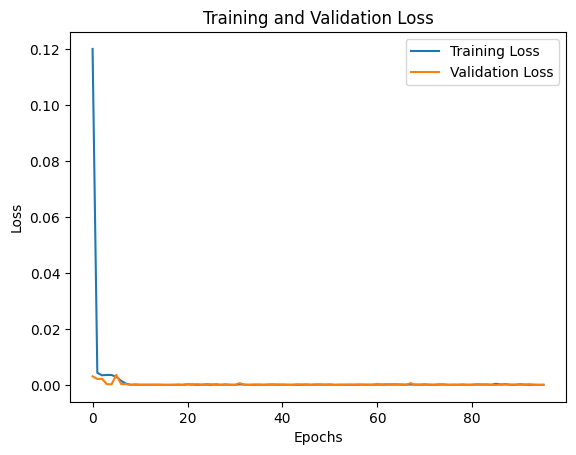

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# model = Sequential([layers.Input((9, 1)),
#                     layers.LSTM(64),
#                     layers.Dense(1)])

model = Sequential([layers.Input((9, 1)),
                   layers.LSTM(40),
                   layers.Dense(173, activation='relu'),
                   layers.Dense(66, activation='relu'),
                   layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.00413257),
              metrics=['mean_absolute_error'])


history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=96)

print(history.history.keys())

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

33/33 [==============================] - 0s 2ms/step


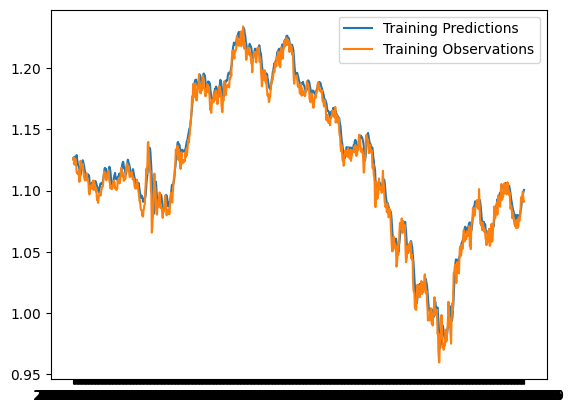

In [ ]:
from sklearn.metrics import mean_squared_error

train_predictions = model.predict(X_train).flatten()
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

65.46031480669201


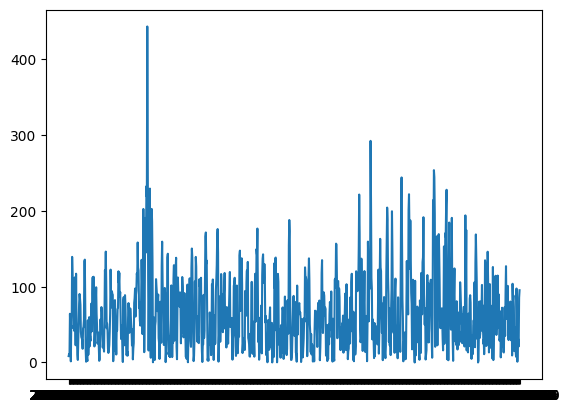

In [ ]:
import numpy as np

basis_point_value=0.0001  #For EURUSD pair
train_data_basis_point_diff=((train_predictions/basis_point_value).flatten()-y_train/basis_point_value).abs()
plt.plot(dates_train, train_data_basis_point_diff)

average_train_data_basis_point_diff=np.mean(train_data_basis_point_diff)
print(average_train_data_basis_point_diff)

5/5 [==============================] - 0s 3ms/step


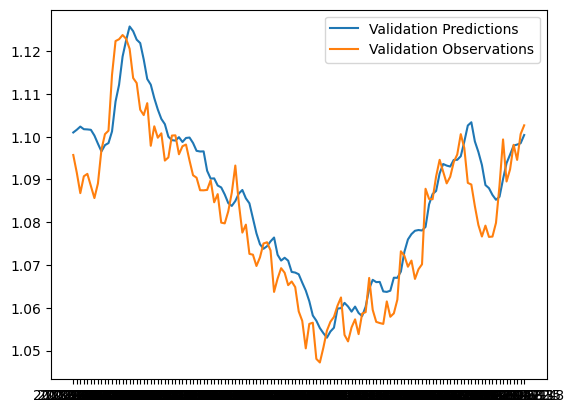

In [ ]:
val_predictions = model.predict(X_val).flatten()
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

61.687093023256125


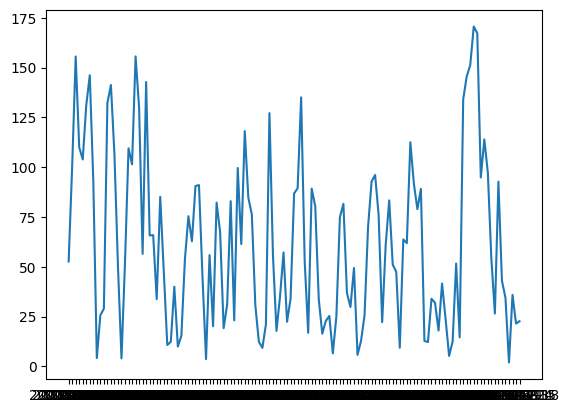

In [ ]:
basis_point_value=0.0001  #For EURUSD pair
validation_data_basis_point_diff=((val_predictions/basis_point_value).flatten()-y_val/basis_point_value).abs()
plt.plot(dates_val, validation_data_basis_point_diff)

print(np.mean(validation_data_basis_point_diff))

5/5 [==============================] - 0s 2ms/step


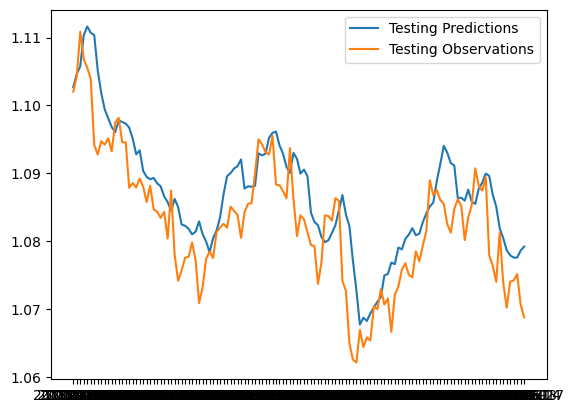

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Assuming test_predictions and y_test are lists or numpy arrays
# Calculate MSE and MAE
mse = mean_squared_error(y_test, test_predictions)
print("Mean Square Error:", mse)
mae=mean_absolute_error(y_test, test_predictions)
print("Mean Absolute Error:", mae)

Mean Square Error: 3.794314722689062e-05
Mean Absolute Error: 0.004974960552391643


49.74980438701966


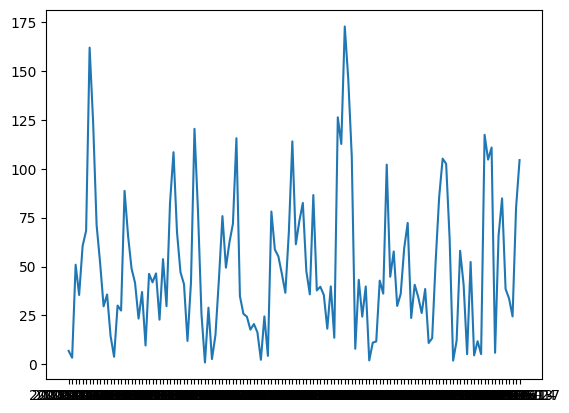

In [ ]:
basis_point_value=0.0001  #For EURUSD pair
test_data_basis_point_diff=((test_predictions/basis_point_value).flatten()-y_test/basis_point_value).abs()
plt.plot(dates_test, test_data_basis_point_diff)

print(np.mean(test_data_basis_point_diff))

In [ ]:
#Start Trading with 1000 USD with model


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_predictions[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_predictions[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)


130
1004.6992945089794
base


In [ ]:
#Start Trading with 1000 USD with actual values


number_of_trading_days=dates_test.size
test_data=y_test.values
holding_currency="quote"
holding_value=1000
for current_trading_day in range(number_of_trading_days-1):
  if holding_currency=="quote":
    if (test_data[current_trading_day+1]>test_data[current_trading_day]):
      holding_value=holding_value/test_data[current_trading_day]
      holding_currency="base"
  else:
    if (test_data[current_trading_day+1]<test_data[current_trading_day]):
      holding_value=test_data[current_trading_day]*holding_value
      holding_currency="quote"


if holding_currency=="base":
  holding_value=test_data[current_trading_day]*holding_value

print(number_of_trading_days)
print(holding_value)
print(holding_currency)

130
1162.4703444056145
quote


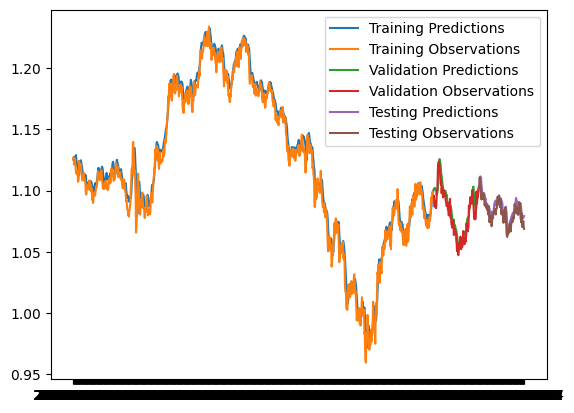

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 25ms/step


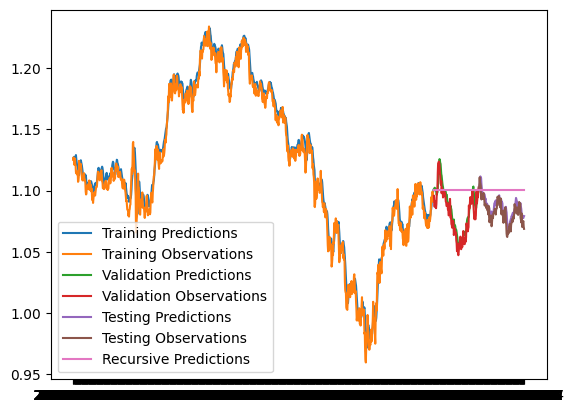

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])